## Manipulating Time Series Data in Python (part2)

In [ ]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
absolute_path = '/content/drive/MyDrive/Data'
%cd $absolute_path

/content/drive/MyDrive/Data


In [ ]:
prices = pd.read_csv('stock_data.csv', parse_dates=['Date'], index_col='Date')

In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


In [ ]:
prices.head(3)

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85


In [ ]:
prices.iloc[0]

AAPL     30.57
AMGN     57.72
AMZN    133.90
CPRT      4.55
EL       24.27
GS      173.08
ILMN     30.55
MA       25.68
PAA      27.00
RIO      56.03
TEF      28.55
UPS      58.18
Name: 2010-01-04 00:00:00, dtype: float64

In [31]:
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [33]:
prices = pd.concat([prices, sp500], axis=1).dropna()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
 12  SP500   1761 non-null   float64
 13  SP500   1761 non-null   float64
 14  SP500   1761 non-null   float64
dtypes: float64(15)
memory usage: 220.1 KB


In [ ]:
# Normalizing multiple series
normalized = prices.div(prices.iloc[0]).mul(100)
normalized.head(3)

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS,SP500
2010-01-04,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,100.196271,99.133749,100.589993,100.00000,99.629172,101.767969,99.345336,99.727414,101.111111,101.552740,99.929947,100.171880,100.311565
2010-01-06,98.593392,98.388773,98.767737,99.56044,99.917594,100.681766,105.466448,99.532710,101.074074,104.658219,98.879159,99.432795,100.366287


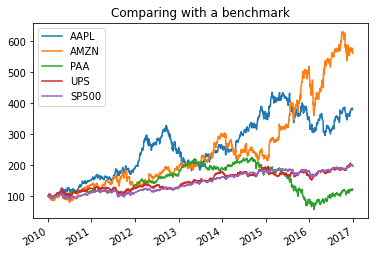

In [ ]:
normalized[['AAPL', 'AMZN', 'PAA', 'UPS', 'SP500']].plot(title='Comparing with a benchmark')

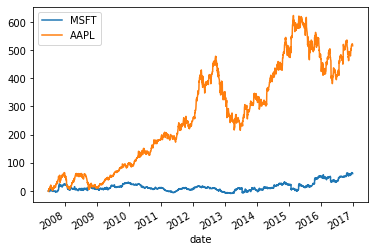

In [ ]:
# Plot performance difference vs benchmark index
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

### Changing the frequency: resampling
##### Freqency conversion affects the data
- Upsampling: fill or interpolate missing data
- Downsampling: aggregate existing data
- Pandas API: .asfreq(), .reindex(), .resample() + transformation method


In [ ]:
# Quarterly data
dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1,5)
quarterly = pd.DataFrame(data=data, index=dates, columns=['baseline'])
quarterly

,baseline
2016-03-31,1
2016-06-30,2
2016-09-30,3
2016-12-31,4


In [ ]:
monthly = quarterly.asfreq('M') # to month-end frequency
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


In [ ]:
monthly['ffill'] = quarterly.asfreq('M', method='ffill')
monthly['bfill'] = quarterly.asfreq('M', method='bfill')
monthly['fill_value'] = quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,fill_value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


In [ ]:
# reindex(): conform DataFrame to new index, same filling logic as .asfreq()
dates = pd.date_range(start='2016', periods=12, freq='M')
quarterly.reindex(dates)

,baseline
2016-01-31,NaN
2016-02-29,NaN
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN


#### **Resampling Period and Frequency Offsets**

> Calendar Month End:   M    2017-04-30\
> Calendar Month Start: MS   2017-04-01\
> Business Month End:   BM   2017-04-28\
> Business Month Start: BMS  2017-04-03




            UNRATE
DATE              
2010-01-03     NaN
2010-01-10     NaN
2010-01-17     NaN
2010-01-24     NaN
2010-01-31     NaN
            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8
            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8


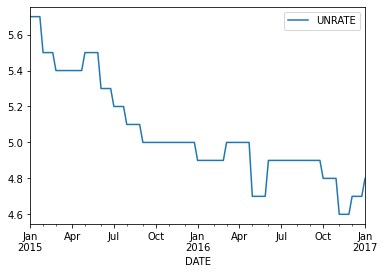

In [41]:
# Import data here
unrate = pd.read_csv('unrate.csv', parse_dates=['DATE'], index_col='DATE')

# Show first five rows of weekly series
print(unrate.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(unrate.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = unrate.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

In [42]:
# Use interpolation to create weekly employment data from 2010 to 2016 monthly data
monthly = unrate.asfreq('M').loc['2010':]
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
# weekly.plot()
# plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2010-01-31 to 2016-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  0 non-null      float64
dtypes: float64(1)
memory usage: 1.3 KB
None


Interpolate monthly real GDP growth

In [35]:
gdp = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [36]:
gdp.head(3)

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7


In [37]:
gdp_1 = gdp.resample('MS').ffill().add_suffix('_ffill')
gdp_1.head(3)

,gdp_growth_ffill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2


In [38]:
# interpolate(): finds points on straight lin between existing data
gdp_2 = gdp.resample('MS').interpolate().add_suffix('_interpolate')
gdp_2.head(3)

,gdp_growth_interpolate
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333


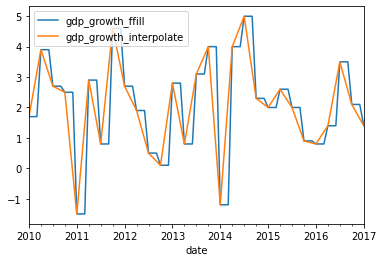

In [48]:
# Plot interpolated real GDP growth
pd.concat([gdp_1, gdp_2], axis=1).loc['2010':].plot()
plt.show()

Combine GDP growth & unemployment

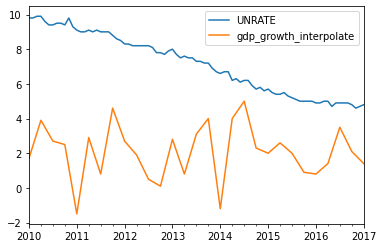

In [49]:
pd.concat([unrate, gdp_2], axis=1).loc['2010':].plot()
plt.show()

Compare weekly, monthly and annual ozone trends for NYC & LA

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB


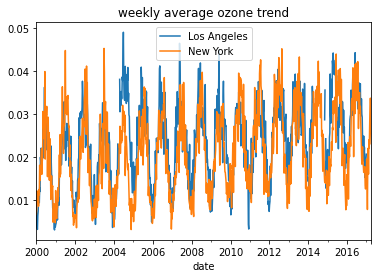

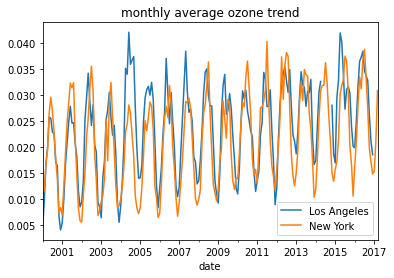

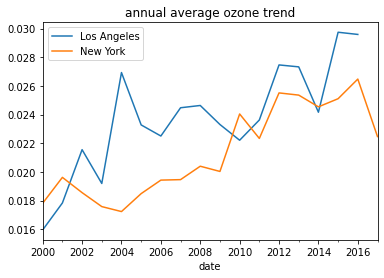

In [26]:
# Import and inspect data here
ozone = pd.read_csv('ozone_nyla.csv', parse_dates=['date'], index_col='date')
ozone.info();

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot(title='weekly average ozone trend');
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot(title='monthly average ozone trend');
plt.show();

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot(title='annual average ozone trend');
plt.show();